# Pokémon神奇宝贝——精灵属性与阵容挖掘

## 1.数据准备

### 1.1 数据集选择

本项目采用[天池](https://tianchi.aliyun.com/)所提供的[pokemon0820](https://tianchi.aliyun.com/competition/entrance/531822/information)数据集，原始数据来源为[http://serebii.net/](http://serebii.net/?spm=5176.12281978.0.0.29ad5ef85k6g4S)

### 1.2 编程语言

python 3.5.6

### 1.3 导入各类依赖包

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# 内嵌画图
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [3]:
from math import sqrt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

## 2. 数据预处理

### 2.1 数据集概况和缺失值处理

先查看该数据集的头和尾

In [9]:
pkm = pd.read_csv('./pokemon0820.csv', encoding = 'ansi')
pkm.head()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0


In [10]:
pkm.tail(10)

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
791,['Shadow Shield'],1.00,4.0,1.0,1.0,1.0,0.0,1.0,1.0,4.0,...,NaN,792,137,107,97,psychic,ghost,120.0,7,1
792,['Beast Boost'],0.50,1.0,1.0,1.0,0.5,1.0,0.5,0.5,1.0,...,NaN,793,127,131,103,rock,poison,55.5,7,1
793,['Beast Boost'],0.50,0.5,1.0,1.0,2.0,0.5,2.0,4.0,1.0,...,NaN,794,53,53,79,bug,fighting,333.6,7,1
794,['Beast Boost'],0.50,0.5,1.0,1.0,2.0,0.5,2.0,4.0,1.0,...,NaN,795,137,37,151,bug,fighting,25.0,7,1
795,['Beast Boost'],1.00,1.0,1.0,0.5,1.0,1.0,1.0,0.5,1.0,...,NaN,796,173,71,83,electric,NaN,100.0,7,1
796,['Beast Boost'],0.25,1.0,0.5,2.0,0.5,1.0,2.0,0.5,1.0,...,NaN,797,107,101,61,steel,flying,999.9,7,1
797,['Beast Boost'],1.00,1.0,0.5,0.5,0.5,2.0,4.0,1.0,1.0,...,NaN,798,59,31,109,grass,steel,0.1,7,1
798,['Beast Boost'],2.00,0.5,2.0,0.5,4.0,2.0,0.5,1.0,0.5,...,NaN,799,97,53,43,dark,dragon,888.0,7,1
799,['Prism Armor'],2.00,2.0,1.0,1.0,1.0,0.5,1.0,1.0,2.0,...,NaN,800,127,89,79,psychic,NaN,230.0,7,1
800,['Soul-Heart'],0.25,0.5,0.0,1.0,0.5,1.0,2.0,0.5,1.0,...,NaN,801,130,115,65,steel,fairy,80.5,7,1


再查看数据的规模

In [11]:
pkm.shape

(801, 41)

接下来查看数据集中各个属性的**数据类型**、**五数概括**和**缺失值情况**

In [12]:
pkm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 41 columns):
abilities            801 non-null object
against_bug          801 non-null float64
against_dark         801 non-null float64
against_dragon       801 non-null float64
against_electric     801 non-null float64
against_fairy        801 non-null float64
against_fight        801 non-null float64
against_fire         801 non-null float64
against_flying       801 non-null float64
against_ghost        801 non-null float64
against_grass        801 non-null float64
against_ground       801 non-null float64
against_ice          801 non-null float64
against_normal       801 non-null float64
against_poison       801 non-null float64
against_psychic      801 non-null float64
against_rock         801 non-null float64
against_steel        801 non-null float64
against_water        801 non-null float64
attack               801 non-null int64
base_egg_steps       801 non-null int64
base_happiness    

依次给出数据集中各字段的解释：

| 属性              | 中文解释                               |
| :---------------- | :------------------------------------- |
| name              | 神奇宝贝的英文名                       |
| japanese_name     | 神奇宝贝的日文名                       |
| pokedex_number    | 神奇宝贝图鉴ID                         |
| percentage_male   | 神奇宝贝为男性的比率(空白为无性别属性) |
| type1             | 神奇宝贝的主种族                       |
| type2             | 神奇宝贝的副种族                       |
| classfication     | 神奇宝贝的精灵类型                     |
| height_m          | 神奇宝贝的身高                         |
| weight_kg         | 神奇宝贝的体重                         |
| capture_rate      | 神奇宝贝的捕捉几率                     |
| base_egg_steps    | 神奇宝贝的孵化阶段                     |
| abilities         | 神奇宝贝的技能                         |
| experience_growth | 神奇宝贝的成长经历                     |
| base_happiness    | 神奇宝贝活跃指数                       |
| against_?         | 18项对?种族的定向攻击伤害指数          |
| hp                | 生命值                                 |
| attack            | 基础攻击属性                           |
| defense           | 基础防御属性                           |
| sp_attack         | 特殊攻击属性                           |
| sp_defense        | 特殊防御属性                           |
| speed             | 基础速度属性                           |
| generation        | 第几代                                 |
| is_legendary      | 是否为传奇神奇宝贝                     |

接着看看数据集中各项属性的五数概括：

In [13]:
pkm.describe()

,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,...,height_m,hp,percentage_male,pokedex_number,sp_attack,sp_defense,speed,weight_kg,generation,is_legendary
count,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,...,781.000000,801.000000,703.000000,801.000000,801.000000,801.000000,801.000000,781.000000,801.000000,801.000000
mean,0.996255,1.057116,0.968789,1.073970,1.068976,1.065543,1.135456,1.192884,0.985019,1.034020,...,1.163892,68.958801,55.155761,401.000000,71.305868,70.911361,66.334582,61.378105,3.690387,0.087391
std,0.597248,0.438142,0.353058,0.654962,0.522167,0.717251,0.691853,0.604488,0.558256,0.788896,...,1.080326,26.576015,20.261623,231.373075,32.353826,27.942501,28.907662,109.354766,1.930420,0.282583
min,0.250000,0.250000,0.000000,0.000000,0.250000,0.000000,0.250000,0.250000,0.000000,0.250000,...,0.100000,1.000000,0.000000,1.000000,10.000000,20.000000,5.000000,0.100000,1.000000,0.000000
25%,0.500000,1.000000,1.000000,0.500000,1.000000,0.500000,0.500000,1.000000,1.000000,0.500000,...,0.600000,50.000000,50.000000,201.000000,45.000000,50.000000,45.000000,9.000000,2.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,65.000000,50.000000,401.000000,65.000000,66.000000,65.000000,27.300000,4.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,...,1.500000,80.000000,50.000000,601.000000,91.000000,90.000000,85.000000,64.800000,5.000000,0.000000
max,4.000000,4.000000,2.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,14.500000,255.000000,100.000000,801.000000,194.000000,230.000000,180.000000,999.900000,7.000000,1.000000


然后，统计缺失值：

In [14]:
pkm.isnull().sum()

abilities              0
against_bug            0
against_dark           0
against_dragon         0
against_electric       0
against_fairy          0
against_fight          0
against_fire           0
against_flying         0
against_ghost          0
against_grass          0
against_ground         0
against_ice            0
against_normal         0
against_poison         0
against_psychic        0
against_rock           0
against_steel          0
against_water          0
attack                 0
base_egg_steps         0
base_happiness         0
base_total             0
capture_rate           0
classfication          0
defense                0
experience_growth      0
height_m              20
hp                     0
japanese_name          0
name                   0
percentage_male       98
pokedex_number         0
sp_attack              0
sp_defense             0
speed                  0
type1                  0
type2                384
weight_kg             20
generation             0


显然，从上面的缺失值情况可以看出，数据集看起来较完整，存在缺失的属性为height_m（缺失20）、percentage_male（缺失98）、type2（缺失384）和weight_kg（20）。

而由于身高和体重无缺失含义，且占比较小，进行删除处理即可。

In [15]:
# creating a copy
pm = pkm.copy()

In [16]:
pm.dropna(inplace=True)

type2是神奇宝贝的副种族，用“No”填充；对为男性的比率用“-1”填充

In [17]:
#填补空值
pm['type2'].fillna('empty',inplace=True)
pm['percentage_male'].fillna(-1,inplace=True)

再看一下处理缺失值的效果：

In [18]:
pkm = pm
pkm.isnull().sum()

abilities            0
against_bug          0
against_dark         0
against_dragon       0
against_electric     0
against_fairy        0
against_fight        0
against_fire         0
against_flying       0
against_ghost        0
against_grass        0
against_ground       0
against_ice          0
against_normal       0
against_poison       0
against_psychic      0
against_rock         0
against_steel        0
against_water        0
attack               0
base_egg_steps       0
base_happiness       0
base_total           0
capture_rate         0
classfication        0
defense              0
experience_growth    0
height_m             0
hp                   0
japanese_name        0
name                 0
percentage_male      0
pokedex_number       0
sp_attack            0
sp_defense           0
speed                0
type1                0
type2                0
weight_kg            0
generation           0
is_legendary         0
dtype: int64

## 3. 数据分析及可视化

### 3.1 特征分析

有以下几类可以初步进行特征分析：

* 分类特征(Categorical Features)：name,type1,type2
* 序数特征(Ordinal Features)：generation
* 连续性特征(Continous Feature)：hp,Attack,defense,sp_attack,sp_defense,speed

#### 3.1.1 序数特征分析

##### 3.1.1.1 generation

统计每代神奇宝贝的数量，并计算各代传奇比例，可视化呈现：

In [19]:
pd.crosstab(pkm.generation,pkm.is_legendary,margins=True)

is_legendary,0,1,All
generation,,,
1,57,0,57
2,46,0,46
3,54,2,56
4,45,1,46
5,61,2,63
6,35,0,35
7,36,0,36
All,334,5,339


第一代传奇比例: 0.03
第二代传奇比例: 0.06
第三代传奇比例: 0.07
第四代传奇比例: 0.12
第五代传奇比例: 0.08
第六代传奇比例: 0.08
第七代传奇比例: 0.21


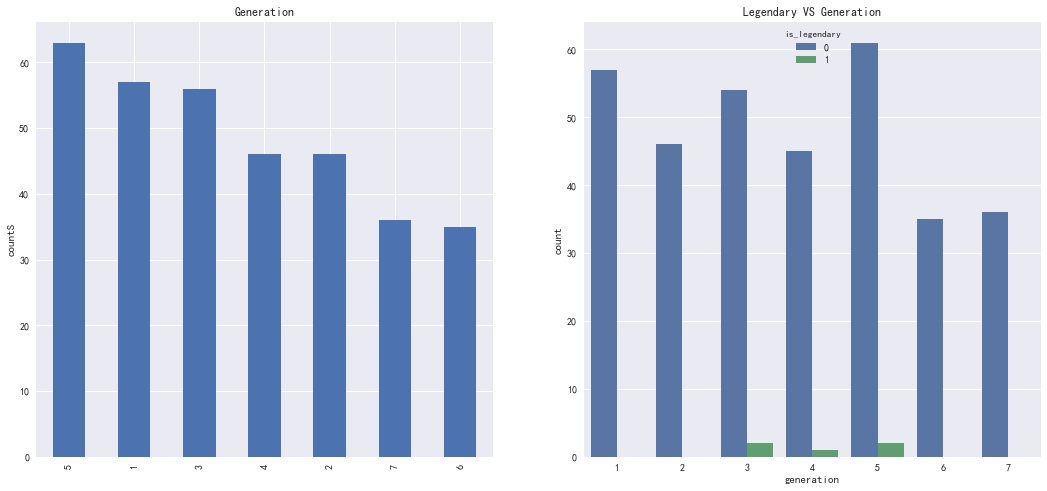

In [20]:
plt.rcParams['font.sans-serif']=['SimHei']
f,ax=plt.subplots(1,2,figsize=(18,8))
pkm['generation'].value_counts().plot.bar(ax=ax[0])
ax[0].set_ylabel('countS')
ax[0].set_title('Generation')
sns.countplot('generation',hue='is_legendary',data=pkm,ax=ax[1])
ax[1].set_title('Legendary VS Generation')
print("第一代传奇比例: %.2f"%round(5/151,2))
print("第二代传奇比例: %.2f"%round(6/100,2))
print("第三代传奇比例: %.2f"%round(10/135,2))
print("第四代传奇比例: %.2f"%round(13/107,2))
print("第五代传奇比例: %.2f"%round(13/156,2))
print("第六代传奇比例: %.2f"%round(6/72,2))
print("第七代传奇比例: %.2f"%round(17/80,2))

可以从图中看到，在第七、四世代出现传奇神奇宝贝的比例较高,分别为21%和12%。

#### 3.1.2 分类特征分析

##### 3.1.2.1 type1

先查看传奇神奇宝贝的主种族：

In [21]:
pkm[['type1','is_legendary']].groupby('type1').count()

,is_legendary
type1,
bug,50
dark,18
dragon,10
electric,6
fairy,2
fighting,6
fire,20
flying,2
ghost,16


再查看主种族的数据描述，以及主种族和是否为传奇神奇宝贝的比较：

In [22]:
pkm[['type1']].describe()

,type1
count,339
unique,18
top,bug
freq,50


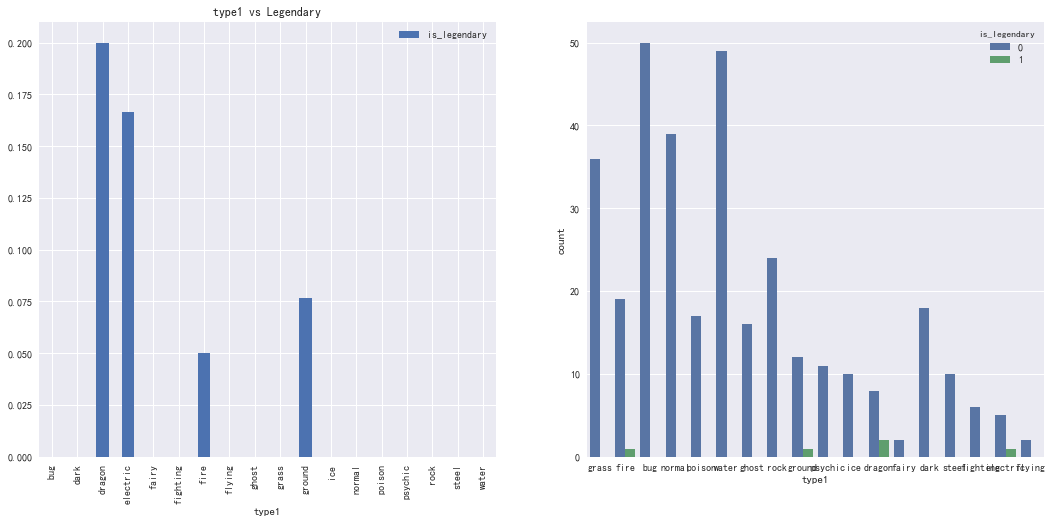

In [23]:
f,ax=plt.subplots(1,2,figsize=(18,8))
pkm[['type1','is_legendary']].groupby('type1').mean().plot.bar(ax=ax[0])
ax[0].set_title('type1 vs Legendary')
sns.countplot('type1',hue='is_legendary',data=pkm,ax=ax[1])

查看副种族的数据描述，以及副种族和是否为传奇神奇宝贝的比较：

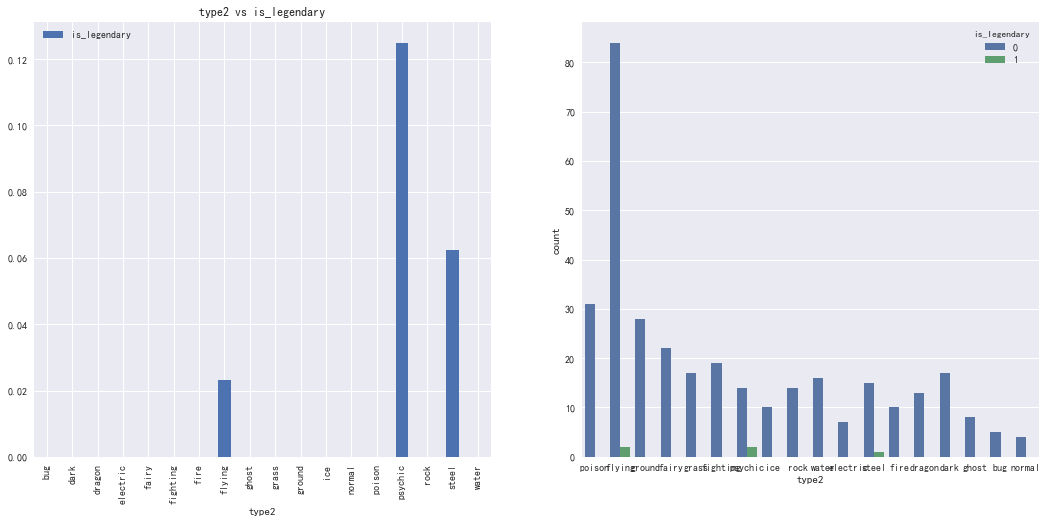

In [24]:
f,ax=plt.subplots(1,2,figsize=(18,8))
pkm[['type2','is_legendary']].groupby('type2').mean().plot.bar(ax=ax[0])
ax[0].set_title('type2 vs is_legendary')
sns.countplot('type2',hue='is_legendary',data=pkm,ax=ax[1])

可以看到副种族相较于主种族缺失值较多，之后将不予分析。

#### 3.1.3 连续性特征分析

##### 3.1.3.1 hp

HP是生命值，在被击倒之前神奇宝贝可以承受多少的伤害。

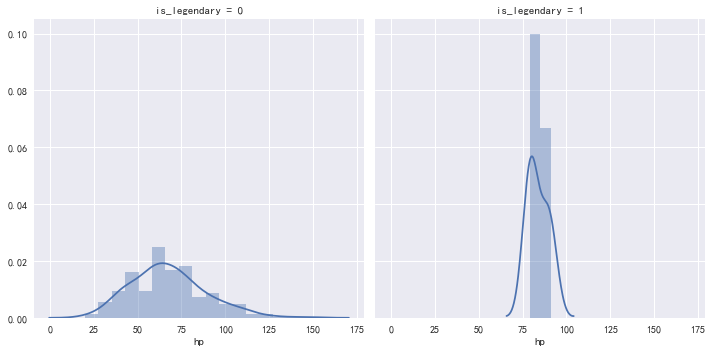

In [25]:
g = sns.FacetGrid(pkm, col='is_legendary',size=5)
g = g.map(sns.distplot, "hp")

not Legendary HP: 60
Legendary HP: 80


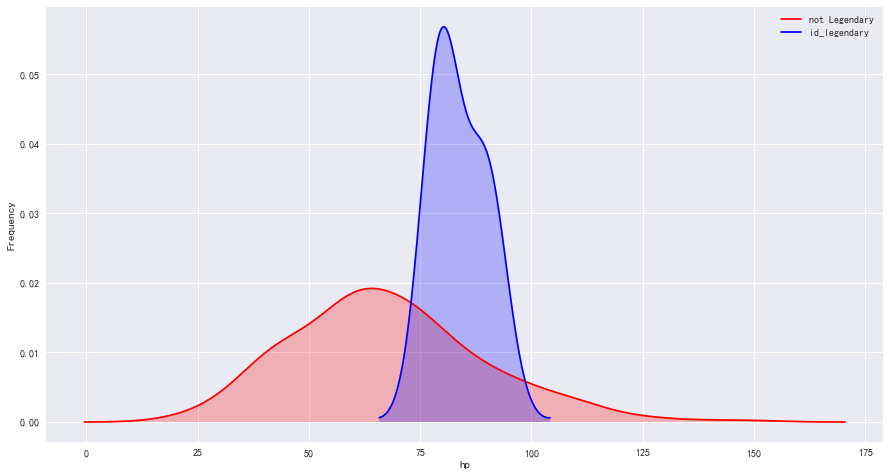

In [26]:
plt.figure(figsize=(15,8))
g = sns.kdeplot(pkm["hp"][pkm["is_legendary"] == False], color="Red", shade = True)
g = sns.kdeplot(pkm["hp"][pkm["is_legendary"] == True], ax =g, color="Blue", shade= True)
g.set_xlabel("hp")
g.set_ylabel("Frequency")
g = g.legend(["not Legendary","id_legendary"])
print('not Legendary HP:',pkm["hp"][pkm["is_legendary"] == 0].value_counts().index[0])
print('Legendary HP:',pkm["hp"][pkm["is_legendary"] == 1].value_counts().index[0])

可以从图中看到，非传奇的神奇宝贝血量集中在60左右，传奇的神奇宝贝血量集中在100左右。

##### 3.1.3.2 attack

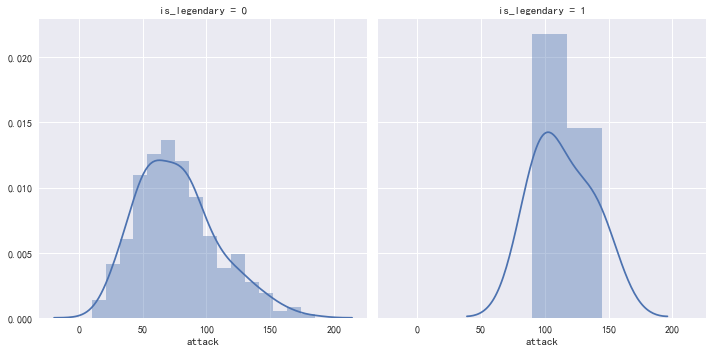

In [27]:
g = sns.FacetGrid(pkm, col='is_legendary',size=5)
g = g.map(sns.distplot, "attack")

not Legendary attack: 50
Legendary attack: 145


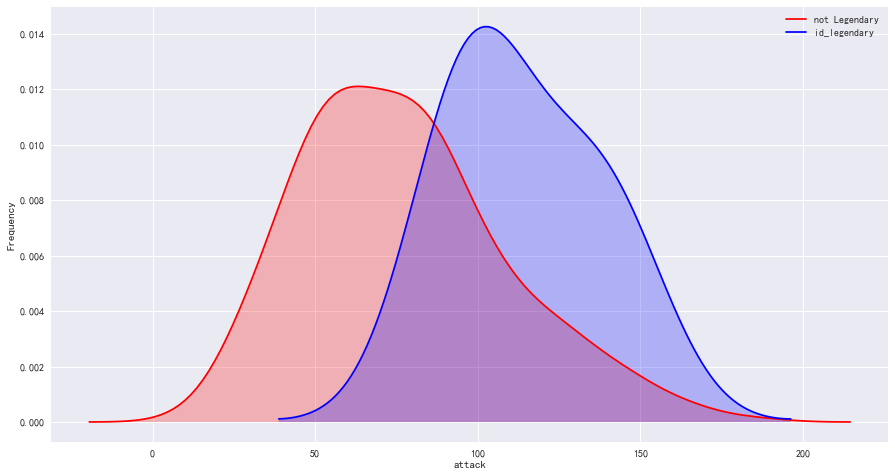

In [28]:
plt.figure(figsize=(15,8))
g = sns.kdeplot(pkm["attack"][pkm["is_legendary"] == False], color="Red", shade = True)
g = sns.kdeplot(pkm["attack"][pkm["is_legendary"] == True], ax =g, color="Blue", shade= True)
g.set_xlabel("attack")
g.set_ylabel("Frequency")
g = g.legend(["not Legendary","id_legendary"])
print('not Legendary attack:',pkm["attack"][pkm["is_legendary"] == 0].value_counts().index[0])
print('Legendary attack:',pkm["attack"][pkm["is_legendary"] == 1].value_counts().index[0])

可以从图中看到，非传奇的神奇宝贝攻击力集中在55左右，传奇的神奇宝贝攻击力集中在100左右。

##### 3.1.3.3 defense

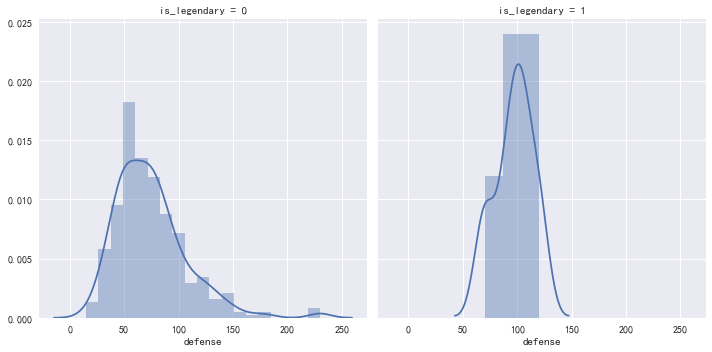

In [29]:
g = sns.FacetGrid(pkm, col='is_legendary',size=5)
g = g.map(sns.distplot, "defense")

not Legendary defense: 50
Legendary defense: 70


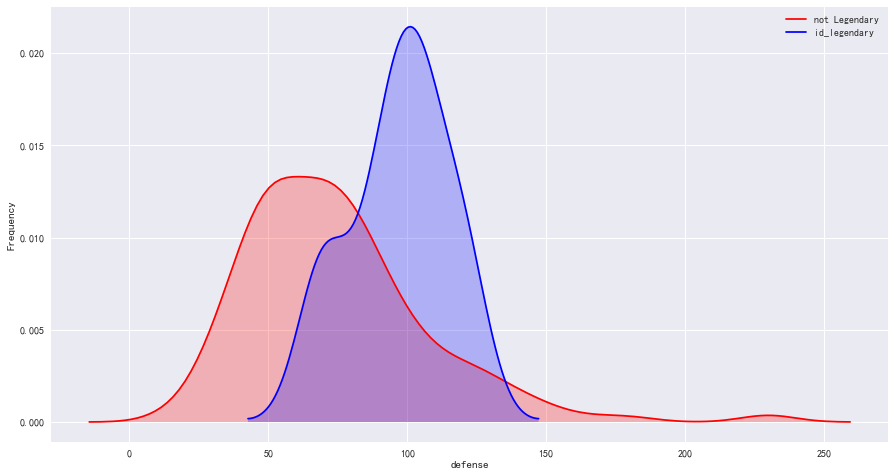

In [30]:
plt.figure(figsize=(15,8))
g = sns.kdeplot(pkm["defense"][pkm["is_legendary"] == False], color="Red", shade = True)
g = sns.kdeplot(pkm["defense"][pkm["is_legendary"] == True], ax =g, color="Blue", shade= True)
g.set_xlabel("defense")
g.set_ylabel("Frequency")
g = g.legend(["not Legendary","id_legendary"])
print('not Legendary defense:',pkm["defense"][pkm["is_legendary"] == 0].value_counts().index[0])
print('Legendary defense:',pkm["defense"][pkm["is_legendary"] == 1].value_counts().index[0])

### 3.2 查看数据集的统计信息

#### 3.2.1 查看每个系口袋妖怪的数量

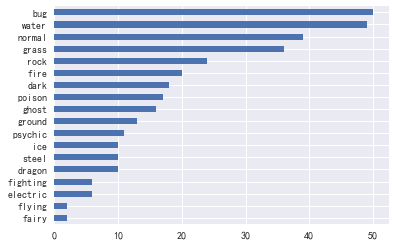

In [31]:
pkm['type1'].value_counts().sort_values(ascending=True).plot.barh()

虫系、水系、常规系、草系、岩石系的口袋妖怪的数量最多

#### 3.2.2 几项重要属性

查看各代的平均攻击力、防御力、血量、速度属性，并绘制属性曲线

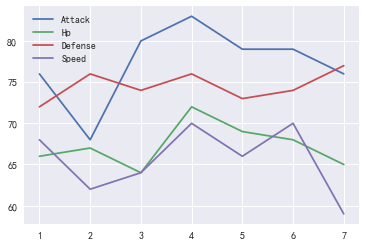

In [32]:
attack = []
for i in range(1,8):
    x = len(pkm[pkm['generation']==i].index)
    attack.append(pkm[pkm['generation']==i]['attack'].sum() // x)
hp = []
for j in range(1,8):
    x = len(pkm[pkm['generation']==j].index)
    hp.append(pkm[pkm['generation']==j]['hp'].sum() // x)
defense = []
for k in range(1,8):
    x = len(pkm[pkm['generation']==k].index)
    defense.append(pkm[pkm['generation']==k]['defense'].sum() // x)
speed = []
for k in range(1,8):
    x = len(pkm[pkm['generation']==k].index)
    speed.append(pkm[pkm['generation']==k]['speed'].sum() // x)
x = range(1,8)
plt.plot(x, attack, label='Attack')
plt.plot(x, hp, label='Hp')
plt.plot(x, defense, label='Defense')
plt.plot(x, speed, label='Speed')
plt.legend()
plt.show()

根据曲线图，我们可以看出第4代与第7代宝可梦的综合属性明显高于其他代的神奇宝贝

#### 3.2.3 重要属性的相关性分析

宏观地查看属性之间的相关性：

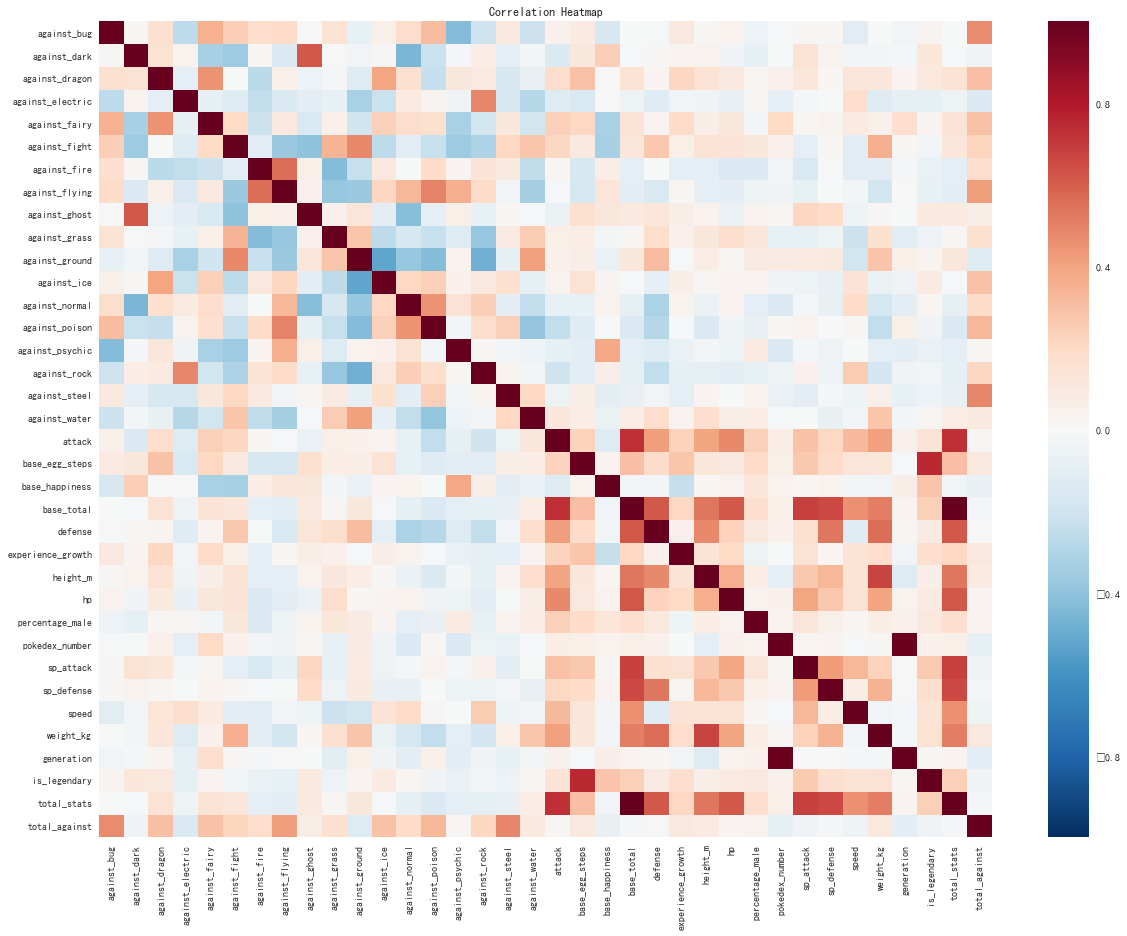

In [67]:
plt.subplots(figsize=(20,15))
ax = plt.axes()
ax.set_title("Correlation Heatmap")
corr = pkm.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

热力图中颜色越深代表代表两个属性之间的相关性程度越高，比如是否为神奇宝贝(is_legendery) 和神奇宝贝的孵化阶段(base_egg_steps)相关性很高，相关性程度为0.75。  
**总结为以下规律：**
- 是否为传奇宝可梦和神奇宝贝的孵化阶段相关性较高
- 神奇宝贝的ID号和第几代相关性较高
- 总攻击能力和特殊攻击属性、特殊战斗、血量、速度属性都相关

#### 3.2.4 不同属性在种族值上的分布

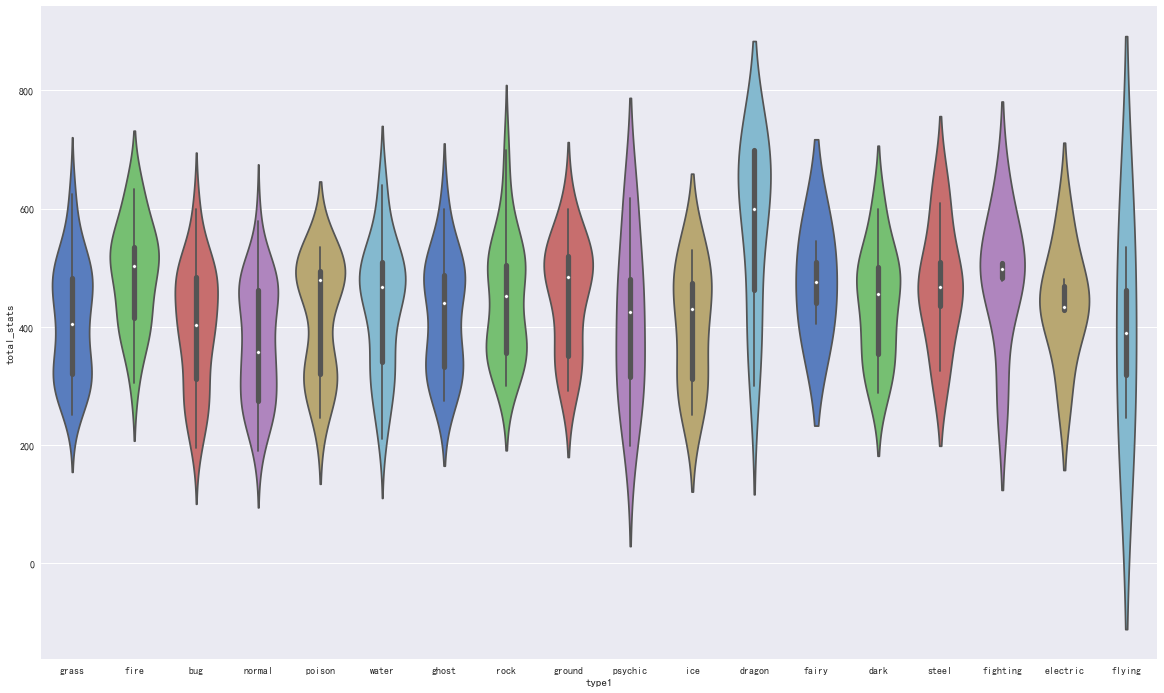

In [68]:
plt.subplots(figsize=(20,12))
ax = sns.violinplot(x="type1", y="total_stats",data=pkm, palette="muted")

#### 3.2.5 分析破蛋步数和经验值的相关性

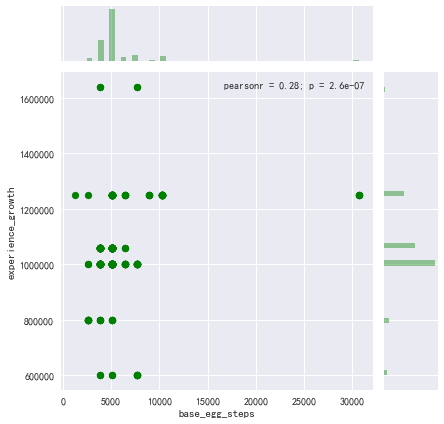

In [35]:
# 采用散点图分析
sns.jointplot("base_egg_steps","experience_growth",data=pkm, color="g")

#### 3.2.6 分析hp和攻击值的相关性

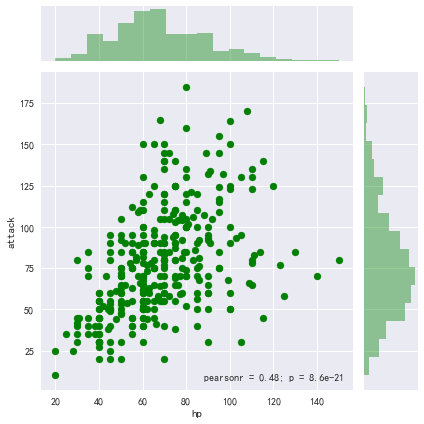

In [36]:
sns.jointplot(x='hp',y='attack',data=pkm,color='g')
plt.show()

#### 3.2.7 分析攻击和hp的相关性

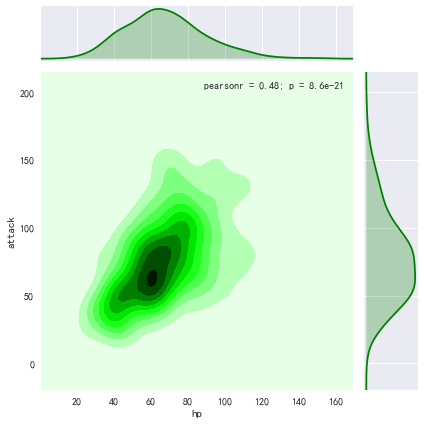

In [37]:
# 采用分层图分析
sns.jointplot("hp", "attack", data=pkm, kind="kde",color='g')

#### 3.2.8 分析攻击和防御关系

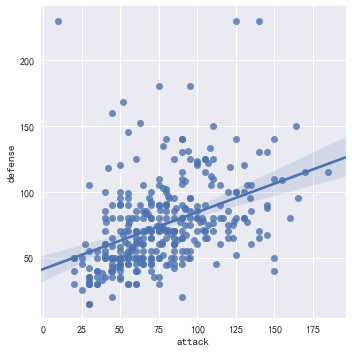

In [38]:
sns.lmplot(x='attack',y='defense',data=pkm)

#### 3.2.9 双属性神奇宝贝统计

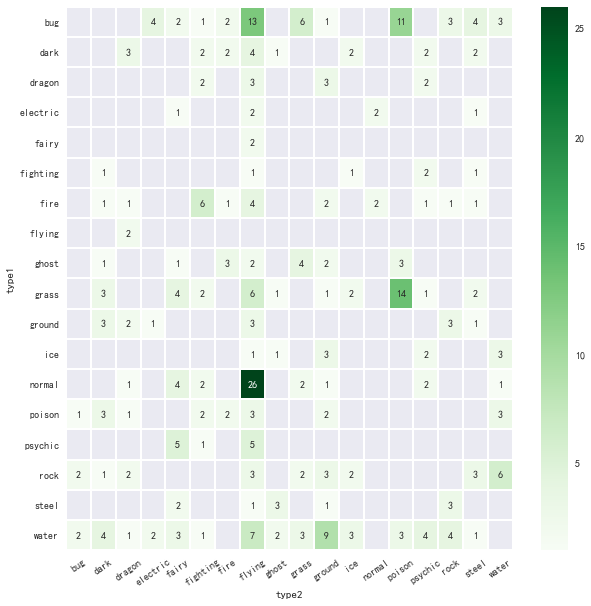

In [39]:
plt.subplots(figsize=(10, 10))

sns.heatmap(
    pkm[pkm['type2']!='None'].groupby(['type1', 'type2']).size().unstack(),
    linewidths=1,
    annot=True,
    cmap="Greens"
)

plt.xticks(rotation=35)
plt.show()

可以看到飞行系和毒系的双属性占比较多，尤其是飞行×普通和毒×草。

#### 3.2.10 查看传说的占比

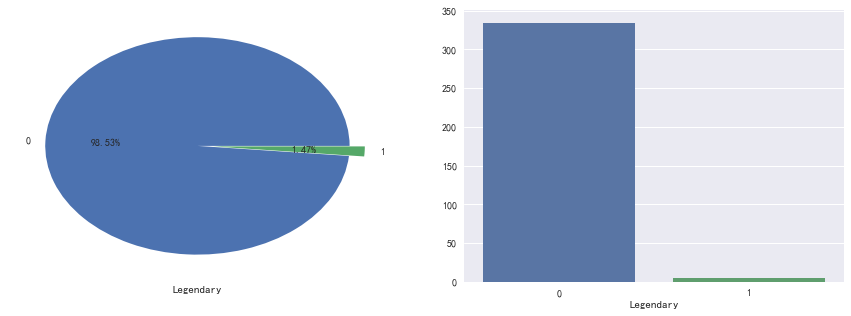

In [40]:
f,ax = plt.subplots(1,2,figsize=(15,5))

pkm['is_legendary'].value_counts().plot.pie(ax=ax[0],shadow=False,explode=[0,0.1],autopct='%1.2f%%')
ax[0].set_ylabel('')    #设置y轴标签
ax[0].set_xlabel('Legendary')    #设置x轴标签
sns.countplot('is_legendary',data=pkm,ax=ax[1])
ax[1].set_ylabel('')
ax[1].set_xlabel('Legendary')
plt.show()

### 3.3 不同玩家的神奇宝贝选择

#### 3.3.1 影响战斗力属性的相关性与数据分布

查看血量、攻击、防御、特攻、特防、速度，这六大重要影响战斗力属性的彼此的相关性与数据分布。

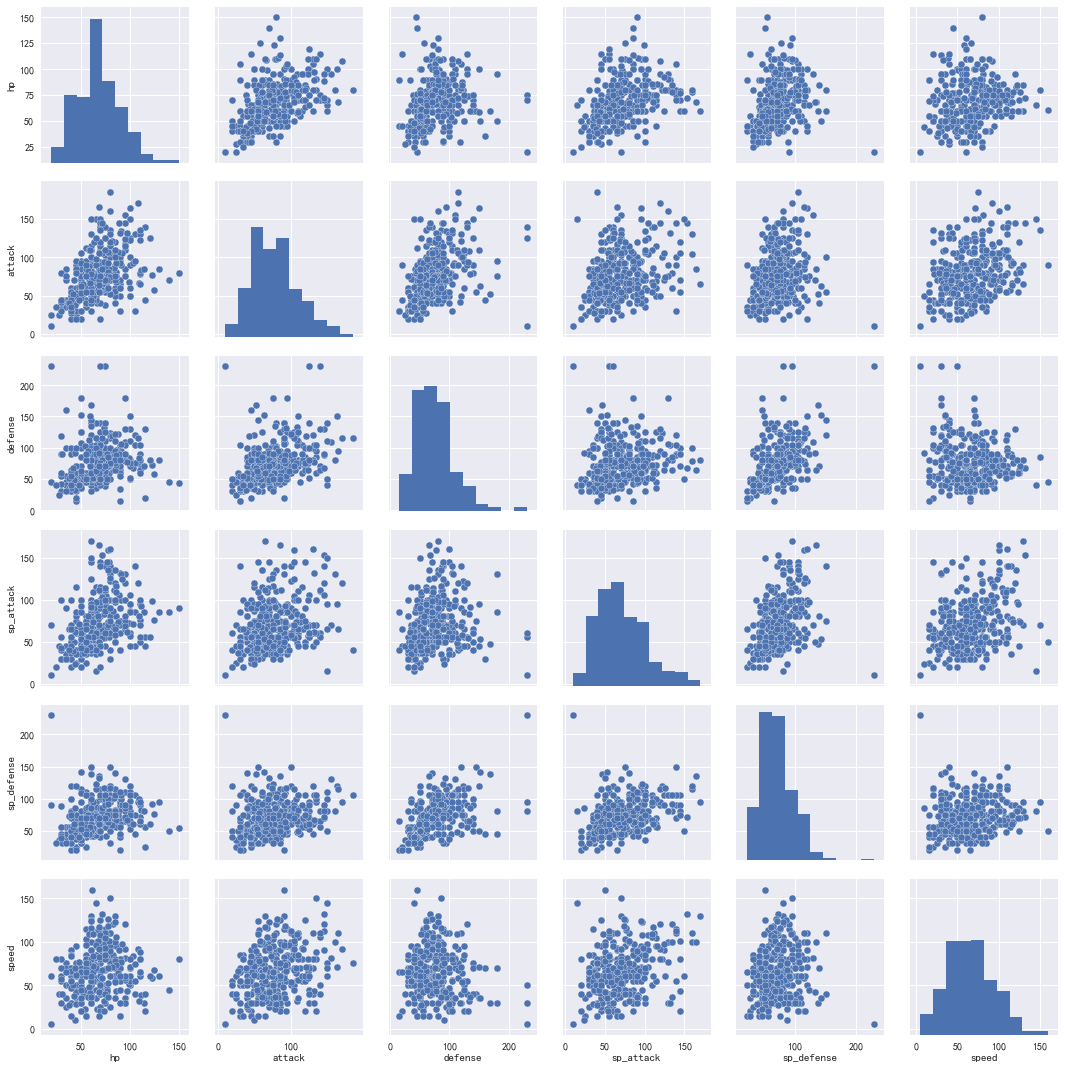

In [41]:
interested = ['hp','attack','defense','sp_attack','sp_defense','speed']
sns.pairplot(pkm[interested])

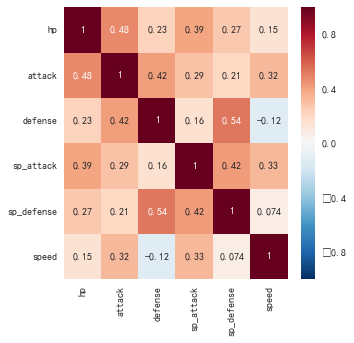

In [42]:
plt.figure(figsize=(5,5))
lst=['hp','attack','defense','sp_attack','sp_defense','speed']
sns.heatmap(pkm[lst].corr(),annot=True)

绘制6大基本属性和种族值的线箱图：

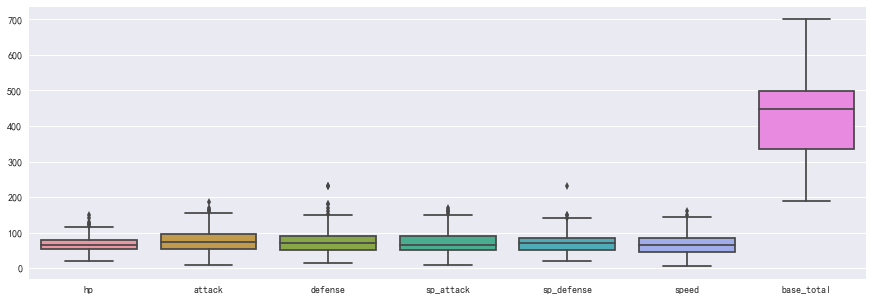

In [43]:
plt.figure(figsize=(15,5))
sns.boxplot(data=pkm[['hp','attack','defense','sp_attack','sp_defense','speed','base_total']])

可以看到hp的异常值较多。

查看六大能力值与是否传说、世代的相关关系：

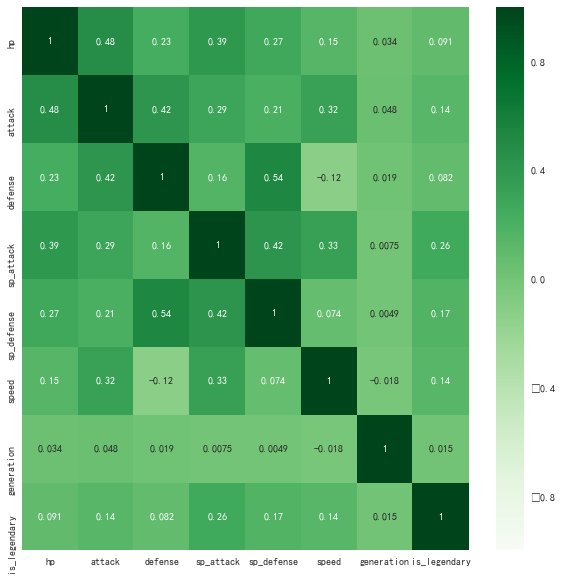

In [44]:
pokemonNew = pkm[['hp','attack','defense','sp_attack','sp_defense','speed','generation','is_legendary']]
                     
plt.figure(figsize=(10,10))    #设置画布
sns.heatmap(pokemonNew.corr(),annot=True,cmap='Greens')
plt.show()

可以看到特殊攻击属性与传说的关系更大一些。

我们定义了宝可梦的一个明确的评价指标：能力值。其数值为血量、攻击、防御、特攻、特防、速度，这六大重要影响战斗力属性之和。

能力值越高，代表这个宝可梦的综合素质越高。

In [45]:
for c in interested:
    pkm[c] = pkm[c].astype(float)
pkm = pkm.assign(total_stats = pkm[interested].sum(axis=1)) 

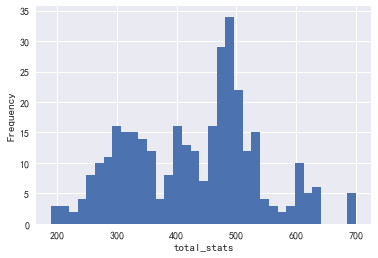

In [46]:
# 能力值分布
total_stats = pkm.total_stats
plt.hist(total_stats,bins=35)
plt.xlabel('total_stats')
plt.ylabel('Frequency')

#### 3.3.2 平民玩家的选择

统计种族值大于570的非传说的神奇宝贝：

In [47]:
pkm[(pkm.total_stats >= 570) & (pkm.is_legendary == 0)]['name']

2        Venusaur
5       Charizard
17        Pidgeot
79        Slowbro
93         Gengar
129      Gyarados
141    Aerodactyl
148     Dragonite
207       Steelix
211        Scizor
213     Heracross
228      Houndoom
247     Tyranitar
256      Blaziken
259      Swampert
281     Gardevoir
305        Aggron
333       Altaria
372     Salamence
444      Garchomp
447       Lucario
459     Abomasnow
474       Gallade
634     Hydreigon
657      Greninja
783       Kommo-o
Name: name, dtype: object

In [48]:
pkm[(pkm.total_stats >= 570) & (pkm.is_legendary == 0)]['name'].head(10)

2        Venusaur
5       Charizard
17        Pidgeot
79        Slowbro
93         Gengar
129      Gyarados
141    Aerodactyl
148     Dragonite
207       Steelix
211        Scizor
Name: name, dtype: object

从结果上看，我们平民训练师应该考虑的Top10神奇宝贝应该是：妙蛙花，喷火龙，水箭龟，比雕，胡地，呆河马，耿鬼，袋兽，大甲，暴鲤龙。

#### 3.3.3 高级玩家的选择

再换一个计算方法，查看能力值排名前35的神奇宝贝的主种族：

In [49]:
Y=pkm.total_stats.sort_values(ascending=False).head(35)
Y

247    700.0
379    700.0
444    700.0
380    700.0
372    700.0
657    640.0
129    640.0
259    635.0
5      634.0
305    630.0
256    630.0
447    625.0
2      625.0
474    618.0
281    618.0
141    615.0
207    610.0
783    600.0
148    600.0
93     600.0
644    600.0
484    600.0
634    600.0
211    600.0
213    600.0
228    600.0
459    594.0
79     590.0
333    590.0
641    580.0
17     579.0
566    567.0
318    560.0
322    560.0
636    550.0
Name: total_stats, dtype: float64

得到能力值靠前的35个神奇宝贝主种族的序号：

In [50]:
Y.keys()

Int64Index([247, 379, 444, 380, 372, 657, 129, 259,   5, 305, 256, 447,   2,
            474, 281, 141, 207, 783, 148,  93, 644, 484, 634, 211, 213, 228,
            459,  79, 333, 641,  17, 566, 318, 322, 636],
           dtype='int64')

在能力值靠前的35个神奇宝贝的主种族中，我们着重关注非传说神奇宝贝，因为普通的神奇宝贝的主种族更容易捕捉，对于平民玩家更具有性价比。

In [51]:
X=pkm.is_legendary==0
X

0      True
1      True
2      True
5      True
11     True
12     True
13     True
14     True
15     True
16     True
17     True
20     True
21     True
30     True
33     True
38     True
39     True
40     True
41     True
42     True
43     True
44     True
45     True
46     True
47     True
48     True
61     True
68     True
69     True
70     True
       ... 
731    True
732    True
736    True
737    True
739    True
740    True
741    True
742    True
746    True
747    True
750    True
751    True
754    True
755    True
756    True
757    True
758    True
759    True
764    True
766    True
767    True
768    True
769    True
775    True
776    True
777    True
778    True
779    True
782    True
783    True
Name: is_legendary, Length: 339, dtype: bool

In [52]:
X[Y.keys()].values

array([ True, False,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False, False,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True], dtype=bool)

成功筛选非传说的且能力值很高的神奇宝贝。

In [53]:
Z=X[Y.keys()][X[Y.keys()].values==False]
Z

379    False
380    False
644    False
484    False
641    False
Name: is_legendary, dtype: bool

不论是否为传说级神奇宝贝，得到高级玩家目标神奇宝贝如下：

In [54]:
pkm.name[Z.keys()]

379       Latias
380       Latios
644     Landorus
484      Heatran
641    Thundurus
Name: name, dtype: object

### 3.4 对抗总能力可视化和线性回归预测

#### 3.4.1 对抗总能力可视化  
先构建对抗总能力列：

In [55]:
col = pkm.columns[1:19]
pkm['total_against'] = pkm[col].sum(axis = 1)

然后对对抗总能力进行排序可视化分析：

In [56]:
pkm.set_index(pkm['name'],inplace=True)
total_against = pkm['total_against'].sort_values(ascending=False)[:20]

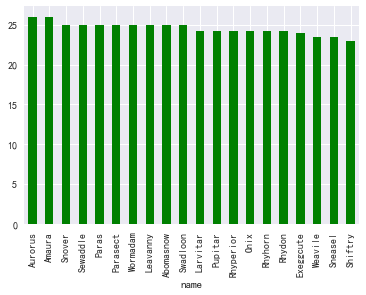

In [57]:
total_against.plot(kind='bar',color='green')

#### 3.4.2 多元线性回归战斗力分析   
利用线性回归算法，基于六个基础属性预测宝可梦的战斗力

In [58]:
X=pkm[['hp','attack','defense','sp_attack','sp_defense','speed']]
X.head()

,hp,attack,defense,sp_attack,sp_defense,speed
name,,,,,,
Bulbasaur,45.0,49.0,49.0,65.0,65.0,45.0
Ivysaur,60.0,62.0,63.0,80.0,80.0,60.0
Venusaur,80.0,100.0,123.0,122.0,120.0,80.0
Charizard,78.0,104.0,78.0,159.0,115.0,100.0
Butterfree,60.0,45.0,50.0,90.0,80.0,70.0


In [59]:
Y=pkm[['base_total']]
Y.head()

,base_total
name,
Bulbasaur,318
Ivysaur,405
Venusaur,625
Charizard,634
Butterfree,395


划分测试集和训练集

In [60]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=1)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(254, 6)
(254, 1)
(85, 6)
(85, 1)


** 构建多元线性回归模型 **

In [62]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, Y_train)
print(linreg.intercept_)
print(linreg.coef_)

[  4.54747351e-13]
[[ 1.  1.  1.  1.  1.  1.]]


测试和评估数据

In [63]:
#模型评价

#模型拟合测试集
Y_pred = linreg.predict(X_test)
from sklearn import metrics
# 用scikit-learn计算MSE
print("MSE:",metrics.mean_squared_error(Y_test, Y_pred))
# 用scikit-learn计算RMSE
print("RMSE:",np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))

MSE: 2.08030602123e-26
RMSE: 1.44232660006e-13


In [64]:
#交叉验证

#计算MSE和RMSE
from sklearn.model_selection import cross_val_predict
predicted = cross_val_predict(linreg, X, Y, cv=10)
# 用scikit-learn计算MSE
print("MSE:",metrics.mean_squared_error(Y, predicted))
# 用scikit-learn计算RMSE
print("RMSE:",np.sqrt(metrics.mean_squared_error(Y, predicted)))

MSE: 7.31065092446e-27
RMSE: 8.55023445553e-14


拟合真实值和测试值，x轴为真实值，y轴为预测值.  
可见预测结果几乎接近真实值

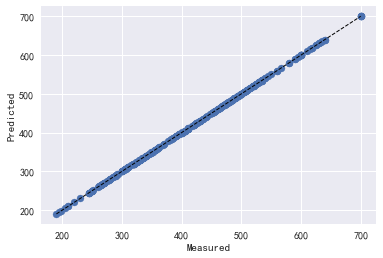

In [65]:
fig, ax = plt.subplots()
ax.scatter(Y, predicted)
ax.plot([Y.min(), Y.max()], [Y.min(), Y.max()], 'k--', lw=1)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

### 3.5 讨论挑战不同道馆的精灵组合

#### 3.5.1 岩石系道馆

首先提出针对岩石系道馆的精灵组合：

In [55]:
pkm = pkm.assign(for_rock = (pkm["base_total"]/(pkm['against_rock']+0.1)) / 100) 
pkm.loc[:, 'for_rock'] = pkm.for_rock
print('最适合打岩石系道馆的六只宠物：')
rock_6 =pkm.sort_values(["for_rock"],ascending=False)[['name','for_rock']].head(6)
print(rock_6)

最适合打岩石系道馆的六只宠物：
                name   for_rock
name                           
Lucario      Lucario  17.857143
Steelix      Steelix  17.428571
Cobalion    Cobalion  16.571429
Excadrill  Excadrill  14.514286
Groudon      Groudon  12.833333
Zygarde      Zygarde  11.800000


#### 3.5.2 格斗系道馆

In [74]:
pkm = pkm.assign(for_fight = (pkm["base_total"]/(pkm['against_fight']+0.1)) / 100) 
pkm.loc[:, 'for_fight'] = pkm.for_fight
print('最适合打格斗系道馆的六只宠物：')
fight_6 =pkm.sort_values(["for_fight"],ascending=False)[['name','for_fight']].head(6)
print(fight_6)

最适合打格斗系道馆的六只宠物：
                name  for_fight
name                           
Hoopa          Hoopa       68.0
Giratina    Giratina       68.0
Lunala        Lunala       68.0
Gengar        Gengar       60.0
Banette      Banette       55.5
Decidueye  Decidueye       53.0


#### 3.5.3 雷电系道馆

In [75]:
pkm = pkm.assign(for_electric = (pkm["base_total"]/(pkm['against_electric']+0.1)) / 100) 
pkm.loc[:, 'for_electric'] = pkm.for_electric
print('最适合打雷电系道馆的六只宠物：')
electric_6 =pkm.sort_values(["for_electric"],ascending=False)[['name','for_electric']].head(6)
print(electric_6)

最适合打雷电系道馆的六只宠物：
              name  for_electric
name                            
Groudon    Groudon          77.0
Zygarde    Zygarde          70.8
Garchomp  Garchomp          70.0
Swampert  Swampert          63.5
Steelix    Steelix          61.0
Landorus  Landorus          60.0


#### 3.5.4 火系道馆

In [76]:
pkm = pkm.assign(for_fire = (pkm["base_total"]/(pkm['against_fire']+0.1)) / 100) 
pkm.loc[:, 'for_fire'] = pkm.for_fire
print('最适合打火系道馆的六只宠物：')
fire_6 =pkm.sort_values(["for_fire"],ascending=False)[['name','for_fire']].head(6)
print(fire_6)

最适合打火系道馆的六只宠物：
                  name   for_fire
name                             
Reshiram      Reshiram  19.428571
Palkia          Palkia  19.428571
Volcanion    Volcanion  17.142857
Kingdra        Kingdra  15.428571
Tyrantrum    Tyrantrum  14.885714
Barbaracle  Barbaracle  14.285714


#### 3.5.5 普通系道馆

In [78]:
pkm = pkm.assign(for_normal= (pkm["base_total"]/(pkm['against_normal']+0.1)) / 100) 
pkm.loc[:, 'for_normal'] = pkm.for_normal
print('最适合打普通系道馆的六只宠物：')
normal_6 =pkm.sort_values(["for_normal"],ascending=False)[['name','for_normal']].head(6)
print(normal_6)

最适合打普通系道馆的六只宠物：
                name  for_normal
name                            
Giratina    Giratina        68.0
Hoopa          Hoopa        68.0
Lunala        Lunala        68.0
Gengar        Gengar        60.0
Banette      Banette        55.5
Decidueye  Decidueye        53.0


#### 3.5.6 飞行系道馆

In [79]:
pkm = pkm.assign(for_flying = (pkm["base_total"]/(pkm['against_flying']+0.1)) / 100) 
pkm.loc[:, 'for_flying'] = pkm.for_flying
print('最适合打飞行系道馆的六只宠物：')
flying_6 =pkm.sort_values(["for_flying"],ascending=False)[['name','for_flying']].head(6)
print(flying_6)

最适合打飞行系道馆的六只宠物：
                  name  for_flying
name                              
Aggron          Aggron   18.000000
Magnezone    Magnezone   15.285714
Probopass    Probopass   15.000000
Bastiodon    Bastiodon   14.142857
Magneton      Magneton   13.285714
Togedemaru  Togedemaru   12.428571


#### 3.5.7 超能系道馆

In [80]:
pkm = pkm.assign(for_psychic = (pkm["base_total"]/(pkm['against_psychic']+0.1)) / 100) 
pkm.loc[:, 'for_psychic'] = pkm.for_psychic
print('最适合打超能系道馆的六只宠物：')
psychic_6 =pkm.sort_values(["for_psychic"],ascending=False)[['name','for_psychic']].head(6)
print(psychic_6)

最适合打超能系道馆的六只宠物：
                name  for_psychic
name                             
Tyranitar  Tyranitar         70.0
Yveltal      Yveltal         68.0
Greninja    Greninja         64.0
Hydreigon  Hydreigon         60.0
Houndoom    Houndoom         60.0
Darkrai      Darkrai         60.0


#### 3.5.8 水系道馆

In [81]:
pkm = pkm.assign(for_water = (pkm["base_total"]/(pkm['against_water']+0.1)) / 100) 
pkm.loc[:, 'for_water'] = pkm.for_water
print('最适合打水系道馆的六只宠物：')
water_6 =pkm.sort_values(["for_water"],ascending=False)[['name','for_water']].head(6)
print(water_6)

最适合打水系道馆的六只宠物：
                name  for_water
name                           
Palkia        Palkia  19.428571
Kingdra      Kingdra  15.428571
Ludicolo    Ludicolo  13.714286
Rayquaza    Rayquaza  13.000000
Kyogre        Kyogre  12.833333
Salamence  Salamence  11.666667


## 4 数据挖掘结果分析

本部分主要对最佳的踢馆精灵组合进行结果分析。在之前的小节中，我们分析出了针对不同的道馆，应该用那些精灵的组合，以确保能够最大概率地成功挑战道馆。

本小节将针对每个道馆进行分析，依据分析的结果（每个道馆的预测最佳踢馆精灵组合），对每个组合进行打分，然后和最优的精灵组合进行比较，使用RMSE方法得出估计误差。

打分的规则是，将精灵的综合值除以对某个属性的抗性，然后在除以一百（便于直观的比较）。

### 4.1 分析内容

#### 4.1.1 岩石系道馆

首先是针对岩石系道馆的精灵组合评估，对其进行RMSE分析：

In [65]:
error = []

for index, row in rock_6.iterrows():
    error.append(row["for_rock"] - rock_6["for_rock"].max())

squaredError = []
absError = []

for val in error:
    squaredError.append(val * val)
    absError.append(abs(val))

print("RMSE = ", sqrt(sum(squaredError) / len(squaredError)))

RMSE =  3.534097487213781


#### 4.1.2 格斗系道馆

接下来是针对格斗系道馆的精灵组合评估，下面是相应的RMSE评估的结果：

In [69]:
error = []

for index, row in fight_6.iterrows():
    error.append(row["for_fight"] - fight_6["for_fight"].max())

squaredError = []
absError = []

for val in error:
    squaredError.append(val * val)
    absError.append(abs(val))

print("RMSE = ", sqrt(sum(squaredError) / len(squaredError)))

RMSE =  8.614425885300385


#### 4.1.3 雷电系道馆

接下来是针对雷电系道馆的精灵组合评估：

In [71]:
error = []

for index, row in electric_6.iterrows():
    error.append(row["for_electric"] - electric_6["for_electric"].max())

squaredError = []
absError = []

for val in error:
    squaredError.append(val * val)
    absError.append(abs(val))

print("RMSE = ", sqrt(sum(squaredError) / len(squaredError)))

RMSE =  11.652539065228087


#### 4.1.4 火系道馆

接下来是针对火系道馆的精灵组合评估。

In [82]:
error = []

for index, row in fire_6.iterrows():
    error.append(row["for_fire"] - fire_6["for_fire"].max())

squaredError = []
absError = []

for val in error:
    squaredError.append(val * val)
    absError.append(abs(val))

print("RMSE = ", sqrt(sum(squaredError) / len(squaredError)))

RMSE =  3.374191765153133


#### 4.1.5 普通系道馆

接下来是针对普通系道馆的精灵组合评估：

In [83]:
error = []

for index, row in normal_6.iterrows():
    error.append(row["for_normal"] - normal_6["for_normal"].max())

squaredError = []
absError = []

for val in error:
    squaredError.append(val * val)
    absError.append(abs(val))

print("RMSE = ", sqrt(sum(squaredError) / len(squaredError)))

RMSE =  8.614425885300385


#### 4.1.6 飞行系道馆

接下来是针对飞行系道馆的精灵组合评估。

In [84]:
error = []

for index, row in normal_6.iterrows():
    error.append(row["for_normal"] - normal_6["for_normal"].max())

squaredError = []
absError = []

for val in error:
    squaredError.append(val * val)
    absError.append(abs(val))

print("RMSE = ", sqrt(sum(squaredError) / len(squaredError)))

RMSE =  8.614425885300385


#### 4.1.7 超能系道馆

接下来是针对超能系道馆的精灵组合评估。

In [85]:
error = []

for index, row in psychic_6.iterrows():
    error.append(row["for_psychic"] - psychic_6["for_psychic"].max())

squaredError = []
absError = []

for val in error:
    squaredError.append(val * val)
    absError.append(abs(val))

print("RMSE = ", sqrt(sum(squaredError) / len(squaredError)))

RMSE =  7.52772652709081


#### 4.1.8 水系道馆

接下来是针对水系道馆的精灵组合评估。

In [86]:
error = []

for index, row in water_6.iterrows():
    error.append(row["for_water"] - water_6["for_water"].max())

squaredError = []
absError = []

for val in error:
    squaredError.append(val * val)
    absError.append(abs(val))

print("RMSE = ", sqrt(sum(squaredError) / len(squaredError)))

RMSE =  5.682193281097455


### 4.2 问题

目前预测最强精灵时，考虑的因素还不够多，不能够全面的反映出一个精灵的强度。

另外，实验的次数和数据不够充分，结果不够准确。

### 4.3 展望

针对上述问题，首先，下一步将会全面考虑精灵的各方面属性，例如破蛋步数、身高、性别概率、重量等属性，进一步得出更加准确的最强精灵；其次，尝试扩大实验次数，观察实验结果会不会因为实验次数的增加而增加。